In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Interactive code to download the KMNIST dataset

## Reference : https://github.com/rois-codh/kmnist/blob/master/download_data.py

import requests

try:
    from tqdm import tqdm
except ImportError:
    tqdm = lambda x, total, unit: x  # If tqdm doesn't exist, replace it with a function that does nothing
    print('**** Could not import tqdm. Please install tqdm for download progressbars! (pip install tqdm) ****')

# Python2 compatibility
try:
    input = raw_input
except NameError:
    pass

download_dict = {
    '1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)': {
        '1) MNIST data format (ubyte.gz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz'],
        '2) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz'],
    },
    '2) Kuzushiji-49 (49 classes, 28x28, 270k examples)': {
        '1) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz'],
    },
    '3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)': {
        '1) Folders of images (.tar)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kkanji/kkanji.tar'],
    }

}

# Download a list of files
def download_list(url_list):
    for url in url_list:
        path = url.split('/')[-1]
        r = requests.get(url, stream=True)
        with open(path, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            print('Downloading {} - {:.1f} MB'.format(path, (total_length / 1024000)))

            for chunk in tqdm(r.iter_content(chunk_size=1024), total=int(total_length / 1024) + 1, unit="KB"):
                if chunk:
                    f.write(chunk)
    print('All dataset files downloaded!')

# Ask the user about which path to take down the dict
def traverse_dict(d):
    print('Please select a download option:')
    keys = sorted(d.keys())  # Print download options
    for key in keys:
        print(key)

    userinput = input('> ').strip()

    try:
        selection = int(userinput) - 1
    except ValueError:
        print('Your selection was not valid')
        traverse_dict(d)  # Try again if input was not valid
        return

    selected = keys[selection]

    next_level = d[selected]
    if isinstance(next_level, list):  # If we've hit a list of downloads, download that list
        download_list(next_level)
    else:
        traverse_dict(next_level)     # Otherwise, repeat with the next level

traverse_dict(download_dict)


Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> 1
Please select a download option:
1) MNIST data format (ubyte.gz)
2) NumPy data format (.npz)
> 2


100%|██████████| 17954/17954 [00:10<00:00, 1703.16KB/s]


100%|██████████| 30/30 [00:00<00:00, 351.64KB/s]


100%|██████████| 3008/3008 [00:02<00:00, 1464.58KB/s]


100%|██████████| 6/6 [00:00<00:00, 6252.38KB/s]

All dataset files downloaded!


In [3]:
# Read the downloaded data
train_images = np.load('kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('kmnist-train-labels.npz')['arr_0']
test_images = np.load('kmnist-test-imgs.npz')['arr_0']
test_labels = np.load('kmnist-test-labels.npz')['arr_0']

In [5]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


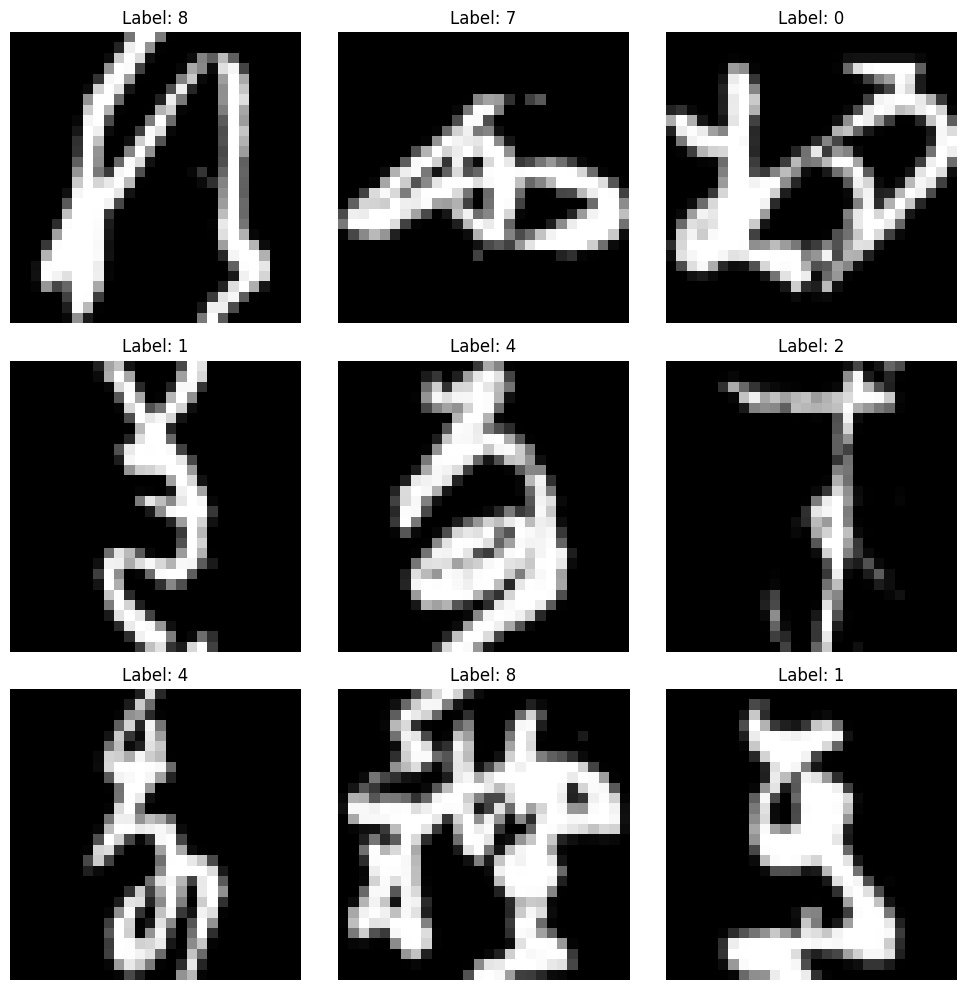

In [9]:
# Visualizing a peice of the training data
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax = ax.flatten()
for i in range(9):
    ax[i].imshow(train_images[i], cmap='gray')
    ax[i].set_title(f'Label: {train_labels[i]}')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Calculate the mean
mean = np.mean(train_images)

# Calculate the variance
variance = np.var(train_images)

# Print the results
print("Training data - Mean:", mean)
print("Training data - Variance:", variance)

Training data - Mean: 48.89934757653061
Training data - Variance: 7890.310852678067


In [11]:
# Standardizing
from sklearn.preprocessing import StandardScaler

# Reshape the data to 2D for StandardScaler
train_images_2d = train_images.reshape(train_images.shape[0], -1)
test_images_2d = test_images.reshape(test_images.shape[0], -1)

In [12]:
# Check the new shape
print(train_images_2d.shape)

(60000, 784)


In [13]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_images_2d)

# Transform the training and test data
train_images_standardized = scaler.transform(train_images_2d)
test_images_standardized = scaler.transform(test_images_2d)

# Reshape the data back to its original shape
train_images_standardized = train_images_standardized.reshape(train_images.shape)
test_images_standardized = test_images_standardized.reshape(test_images.shape)

In [18]:
# Checking whether it's back to it's original shape
print(train_images_standardized.shape)
print('-' * 30)

# Calculate the mean
train_mean_standardized = np.mean(train_images_standardized)
test_mean_standardized = np.mean(test_images_standardized)

# Calculate the variance
train_variance_standardized = np.var(train_images_standardized)
test_variance_standardized = np.var(test_images_standardized)

# Print the results
print(f"Training data after standardization - Mean: {train_mean_standardized:.2f}")
print(f"Test data after standardization - Mean: {test_mean_standardized:.2f}")
print('-' * 30)
print(f"Training data after standardization - Variance: {train_variance_standardized:.2f}")
print(f"Test data after standardization - Variance: {test_variance_standardized:.2f}")

(60000, 28, 28)
------------------------------
Training data after standardization - Mean: -0.00
Test data after standardization - Mean: -0.02
------------------------------
Training data after standardization - Variance: 1.00
Test data after standardization - Variance: 0.98


Label distribution: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


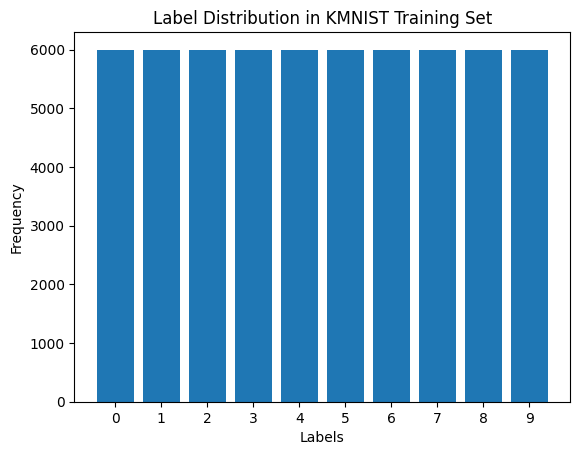

In [19]:
# Labels
# Count occurrences of each label in the training set
unique, counts = np.unique(train_labels, return_counts=True)
label_distribution = dict(zip(unique, counts))

# Print the label distribution
print("Label distribution:", label_distribution)

# Plot the distribution
plt.bar(label_distribution.keys(), label_distribution.values())
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Distribution in KMNIST Training Set')
plt.xticks(range(10))  # Show x-ticks for each label
plt.show()

In [20]:
# Saving

# Save standardized training data
np.savez_compressed('kmnist_train_preprocessed.npz', images=train_images_standardized, labels=train_labels)

# Save standardized test data
np.savez_compressed('kmnist_test_preprocessed.npz', images=test_images_standardized, labels=test_labels)

In [ ]:
"""

# Loading
# use the following code to load the data

import numpy as np

# Load standardized training data
loaded_train_data = np.load('kmnist_train_preprocessed.npz')
train_images = loaded_train_data['images']
train_labels = loaded_train_data['labels']

# Load standardized test data
loaded_test_data = np.load('kmnist_test_preprocessed.npz')
test_images = loaded_test_data['images']
test_labels = loaded_test_data['labels']


"""